# 이미지 인식하는 원리 

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 각각 몇개의 이미지로 되어있는지 확인
print("학습셋 이미지 수 : %d개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


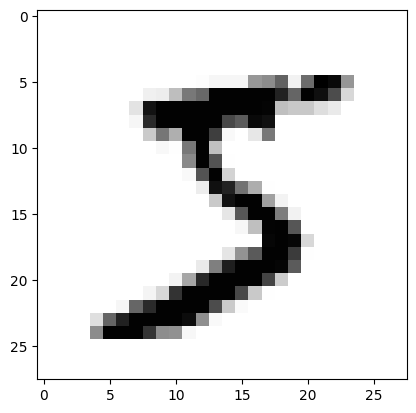

In [5]:
# 이미지 한개 불러오기 
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
# 이미지가 인식되는 원리 알아보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [7]:
# 차원 변환 과정 실습
# 28 x 28 = 784
# reshape() : (총 샘플 수, 1차원 속성의 개수) 형식으로 지정
# astype() : 자료형 변환 함수
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값 확인
print("class : %d " % (y_train[0]))

# 바이너리화 과정 실습 
# to_categorical() : (클래스, 클래스의 개수) 형식으로 지정
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 기본 프레임

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터 불러오기 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누어 주기.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정구간
MODEL_DIR = './data/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./data/model/MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.18820, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00002: val_loss improved from 0.18820 to 0.14300, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00003: val_loss improved from 0.14300 to 0.12016, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00004: val_loss improved from 0.12016 to 0.09795, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00005: val_loss did not improve from 0.09795

Epoch 00006: val_loss improved from 0.09795 to 0.08740, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00007: val_loss did not improve from 0.08740

Epoch 00008: val_loss improved from 0.08740 to 0.08552, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00009: val_loss improved from 0.08552 to 0.08448, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00010: val_loss improved from 0.08448 to 0.08324, saving model to ./data/model\MNIST_MLP.hdf5

Epoch 00011: val_loss improved from 0.08324 to 0.08040, saving model to ./data/model\MNIST_

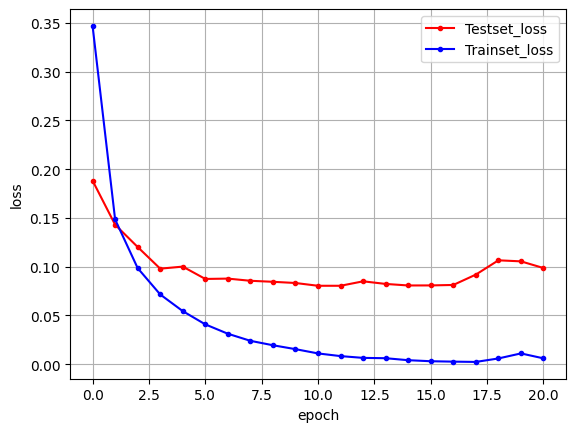

In [10]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현 
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 컨볼루션 신경망(CNN)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간 
modelpath = "./MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 10)

# 모델 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.07460, saving model to .\MNIST_CNN.hdf5

Epoch 00002: val_loss improved from 0.07460 to 0.05324, saving model to .\MNIST_CNN.hdf5

Epoch 00003: val_loss improved from 0.05324 to 0.04896, saving model to .\MNIST_CNN.hdf5

Epoch 00004: val_loss improved from 0.04896 to 0.04655, saving model to .\MNIST_CNN.hdf5

Epoch 00005: val_loss improved from 0.04655 to 0.04008, saving model to .\MNIST_CNN.hdf5

Epoch 00006: val_loss did not improve from 0.04008

Epoch 00007: val_loss improved from 0.04008 to 0.03974, saving model to .\MNIST_CNN.hdf5

Epoch 00008: val_loss did not improve from 0.03974

Epoch 00009: val_loss did not improve from 0.03974

Epoch 00010: val_loss did not improve from 0.03974

Epoch 00011: val_loss improved from 0.03974 to 0.03869, saving model to .\MNIST_CNN.hdf5

Epoch 00012: val_loss did not improve from 0.03869

Epoch 00013: val_loss did not improve from 0.03869

Epoch 00014: val_loss did not improve from 0.03869

Epoch 000

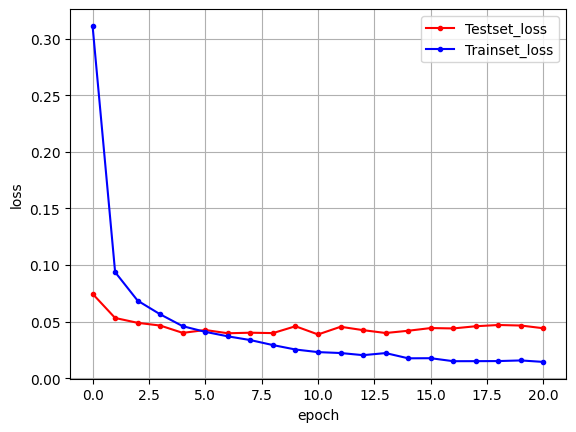

In [13]:
# 검증셋과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()